# Tarea: 07
# Nombre: Lenin Vasquez
https://github.com/Lenin5592002/Metodos

## Ejercicio 1 

Datos:
$
(0,1),\quad (1,5),\quad (2,3)
$

Tomamos

$
\begin{aligned}
S_0(x) &= a_0 + b_0 x + c_0 x^2 + d_0 x^3,\quad 0\le x\le 1,\\
S_1(x) &= a_1 + b_1 x + c_1 x^2 + d_1 x^3,\quad 1\le x\le 2.
\end{aligned}
$

Resolviendo el sistema de ecuaciones (interpolación + derivadas) se obtiene:

$
a_0 = 1,\quad b_0 = \frac{11}{2},\quad c_0 = 0,\quad d_0 = -\frac{3}{2},
$

$
a_1 = 5,\quad b_1 = 1,\quad c_1 = -\frac{9}{2},\quad d_1 = \frac{3}{2}.
$

Por lo tanto, el spline cúbico natural es

$
{
\begin{aligned}
S_0(x) &= 1 + \frac{11}{2}x - \frac{3}{2}x^3, & 0\le x\le 1,\\[2mm]
S_1(x) &= \frac{3}{2}x^3 - 9x^2 + \frac{29}{2}x - 2, & 1\le x\le 2.
\end{aligned}
}
$



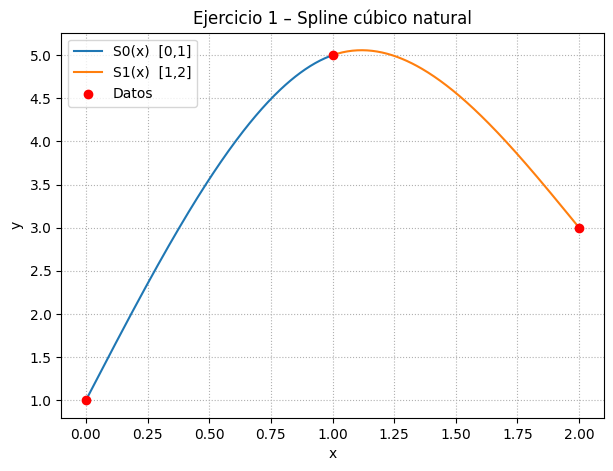

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Spline del ejercicio 1
def S0(x):
    return 1 + (11/2)*x - (3/2)*x**3  # 0 <= x <= 1

def S1(x):
    return (3/2)*x**3 - 9*x**2 + (29/2)*x - 2  # 1 <= x <= 2

# Para graficar
x1 = np.linspace(0, 1, 200)
x2 = np.linspace(1, 2, 200)

plt.figure(figsize=(7,5))
plt.plot(x1, S0(x1), label="S0(x)  [0,1]")
plt.plot(x2, S1(x2), label="S1(x)  [1,2]")

# puntos originales
xs = np.array([0,1,2])
ys = np.array([1,5,3])
plt.scatter(xs, ys, color="red", zorder=5, label="Datos")

plt.grid(True, linestyle=":")
plt.legend()
plt.title("Ejercicio 1 – Spline cúbico natural")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Ejercicio 2 

Solo hay un intervalo $[-1,1]$, así que buscamos un único polinomio cúbico

$
S(x) = a + b(x+1) + c(x+1)^2 + d(x+1)^3.
$

Condiciones:

1. $S(-1) = 1$  (pasa por el punto $(-1,1)$)
2. $S(1) = 3$   (pasa por el punto $(1,3)$)
3. $S'(-1) = 1$ (derivada en el extremo izquierdo)
4. $S'(1) = 2$  (derivada en el extremo derecho)

Resolviendo el sistema se obtienen:

$
a = 1,\quad b = 1,\quad c = -\frac{1}{2},\quad d = \frac{1}{4}.
$

Entonces

$
S(x) = 1 + (x+1) - \frac{1}{2}(x+1)^2 + \frac{1}{4}(x+1)^3.
$

En forma expandida:

$
{S(x) = \frac{1}{4}x^3 + \frac{1}{4}x^2 + \frac{3}{4}x + \frac{7}{4}},\quad -1\le x\le 1.
$


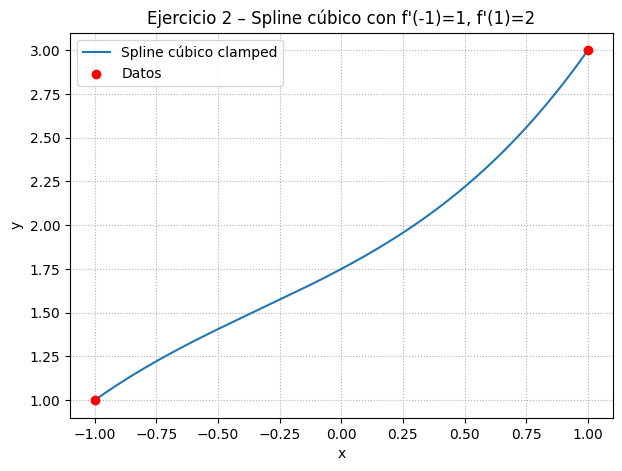

In [2]:
def S_clamped(x):
    # S(x) = 1 + (x+1) - 0.5*(x+1)**2 + 0.25*(x+1)**3
    return 1 + (x+1) - 0.5*(x+1)**2 + 0.25*(x+1)**3

# Rango para graficar
x_vals = np.linspace(-1, 1, 200)

plt.figure(figsize=(7,5))
plt.plot(x_vals, S_clamped(x_vals), label="Spline cúbico clamped")

# puntos con sus derivadas (solo marcamos los puntos)
xs2 = np.array([-1, 1])
ys2 = np.array([1, 3])
plt.scatter(xs2, ys2, color="red", zorder=5, label="Datos")

plt.grid(True, linestyle=":")
plt.legend()
plt.title("Ejercicio 2 – Spline cúbico con f'(-1)=1, f'(1)=2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Ejercicio 3 



In [1]:
import sympy as sym

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Expr]:
    """
    Spline cúbico natural.
    Cada par de puntos se interpola con un polinomio cúbico
    S_j(x) = a_j + b_j (x - x_j) + c_j (x - x_j)^2 + d_j (x - x_j)^3
    para x_j <= x <= x_{j+1}.

    xs, ys: listas con las coordenadas de los puntos (misma longitud)
    return: lista de expresiones simbólicas S_j(x).
    """
    x = sym.Symbol("x")

    # 1) Ordenar puntos por x (por si vienen desordenados)
    points = sorted(zip(xs, ys), key=lambda p: p[0])
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]

    n = len(xs) - 1          # número de splines (intervalos)

    # 2) Distancias h_i = x_{i+1} - x_i
    h = [xs[i+1] - xs[i] for i in range(n)]

    # 3) Vector alpha (paso 2 del algoritmo)
    alpha = [0.0] * (n + 1)
    for i in range(1, n):
        alpha[i] = (3/h[i])*(ys[i+1] - ys[i]) - (3/h[i-1])*(ys[i] - ys[i-1])

    # 4) Paso hacia adelante: l, mu, z (pasos 3 y 4 del algoritmo)
    l = [0.0] * (n + 1)
    mu = [0.0] * (n + 1)
    z = [0.0] * (n + 1)

    l[0] = 1.0
    mu[0] = 0.0
    z[0] = 0.0

    for i in range(1, n):
        l[i] = 2*(xs[i+1] - xs[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]

    # Condiciones naturales en el extremo derecho
    l[n] = 1.0
    z[n] = 0.0

    # 5) Sustitución hacia atrás para a,b,c,d  (pasos 5 y 6)
    a = ys[:-1]               # a_j = y_j
    b = [0.0] * n
    c = [0.0] * (n + 1)
    d = [0.0] * n

    c[n] = 0.0               # condición natural

    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = ((ys[j+1] - ys[j]) / h[j]
                - h[j] * (c[j+1] + 2*c[j]) / 3)
        d[j] = (c[j+1] - c[j]) / (3*h[j])

    # 6) Construir los polinomios S_j(x)
    splines = []
    for j in range(n):
        S_j = (a[j]
               + b[j] * (x - xs[j])
               + c[j] * (x - xs[j])**2
               + d[j] * (x - xs[j])**3)
        splines.append(sym.simplify(S_j))

    return splines, xs  # devolvemos también los nodos para saber los intervalos


## Ejercicio 4 

Usamos la función cubic_spline con:

```python
xs = [1, 2, 3]
ys = [2, 3, 5]


S_0(x) en [1, 2] =
0.75*x + 0.25*(x - 1)**3 + 1.25

S_1(x) en [2, 3] =
-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0



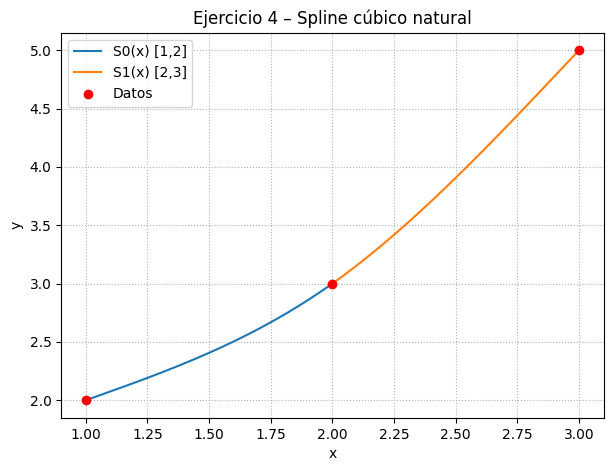

In [2]:


# Ejercicio 4
xs_4 = [1, 2, 3]
ys_4 = [2, 3, 5]

splines_4, xs_nodes_4 = cubic_spline(xs_4, ys_4)

x = sym.Symbol("x")
for i, S in enumerate(splines_4):
    print(f"S_{i}(x) en [{xs_nodes_4[i]}, {xs_nodes_4[i+1]}] =")
    print(sym.simplify(S))
    print()

# (Opcional) gráfica
import numpy as np
import matplotlib.pyplot as plt

xx1 = np.linspace(1, 2, 200)
xx2 = np.linspace(2, 3, 200)

S0_4 = sym.lambdify(x, splines_4[0], "numpy")
S1_4 = sym.lambdify(x, splines_4[1], "numpy")

plt.figure(figsize=(7,5))
plt.plot(xx1, S0_4(xx1), label="S0(x) [1,2]")
plt.plot(xx2, S1_4(xx2), label="S1(x) [2,3]")

plt.scatter(xs_4, ys_4, color="red", zorder=5, label="Datos")
plt.grid(True, linestyle=":")
plt.legend()
plt.title("Ejercicio 4 – Spline cúbico natural")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Ejercicio 5 – Spline cúbico natural para xs = [0,1,2,3], ys = [-1,1,5,2]

Con:

```python
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]


S_0(x) en [0, 1] =
1.0*x**3 + 1.0*x - 1.0

S_1(x) en [1, 2] =
-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

S_2(x) en [2, 3] =
2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0



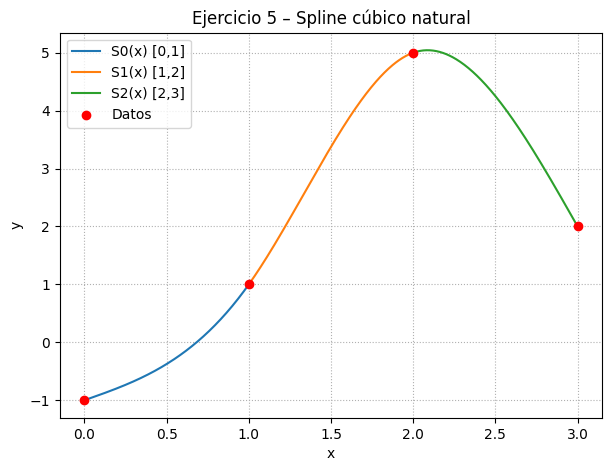

In [3]:


# Ejercicio 5
xs_5 = [0, 1, 2, 3]
ys_5 = [-1, 1, 5, 2]

splines_5, xs_nodes_5 = cubic_spline(xs_5, ys_5)

for i, S in enumerate(splines_5):
    print(f"S_{i}(x) en [{xs_nodes_5[i]}, {xs_nodes_5[i+1]}] =")
    print(sym.simplify(S))
    print()

# (Opcional) gráfica
xx0 = np.linspace(0, 1, 200)
xx1 = np.linspace(1, 2, 200)
xx2 = np.linspace(2, 3, 200)

S0_5 = sym.lambdify(x, splines_5[0], "numpy")
S1_5 = sym.lambdify(x, splines_5[1], "numpy")
S2_5 = sym.lambdify(x, splines_5[2], "numpy")

plt.figure(figsize=(7,5))
plt.plot(xx0, S0_5(xx0), label="S0(x) [0,1]")
plt.plot(xx1, S1_5(xx1), label="S1(x) [1,2]")
plt.plot(xx2, S2_5(xx2), label="S2(x) [2,3]")

plt.scatter(xs_5, ys_5, color="red", zorder=5, label="Datos")
plt.grid(True, linestyle=":")
plt.legend()
plt.title("Ejercicio 5 – Spline cúbico natural")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
